Building prefix dict from the default dictionary ...


Model loaded succeed


Dumping model to file cache C:\Users\TANGYI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.357 seconds.
Prefix dict has been built successfully.


Top 20 Words by TF-IDF using jieba:
     word     tfidf
7      毛宁  0.055799
1016   岛国  0.048919
1504  汪文斌  0.048598
182    人权  0.037118
4654   中拉  0.035884
3307   论坛  0.035001
1913  阿富汗  0.032146
1644   金砖  0.030283
4554  阿拉伯  0.030068
854   太平洋  0.028314
1287   中欧  0.026946
1517   浪费  0.026500
1515   粮食  0.026026
4758   外空  0.025898
1071   化武  0.025825
3306   中东  0.025692
15     中巴  0.025445
1117   创新  0.022034
2080   王毅  0.021198
1531   主席  0.021081




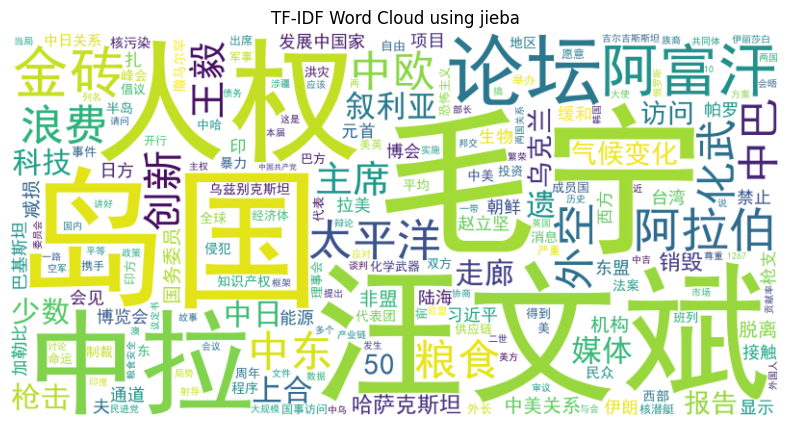

Top 20 Words by TF-IDF using thulac:
     word     tfidf
5      毛宁  0.052758
980    岛国  0.046262
1433  汪文斌  0.045415
184    人权  0.035708
2969   论坛  0.031295
3271    拉  0.031100
1806  阿富汗  0.030248
1208    欧  0.028639
828   太平洋  0.028203
1443   粮食  0.026047
2968   中东  0.024128
4128   外空  0.023872
3915   非盟  0.023662
1565    砖  0.022735
594     金  0.021623
2448    夫  0.021529
1445   浪费  0.021419
1207   东盟  0.021009
1739   访问  0.020238
889    科技  0.020092




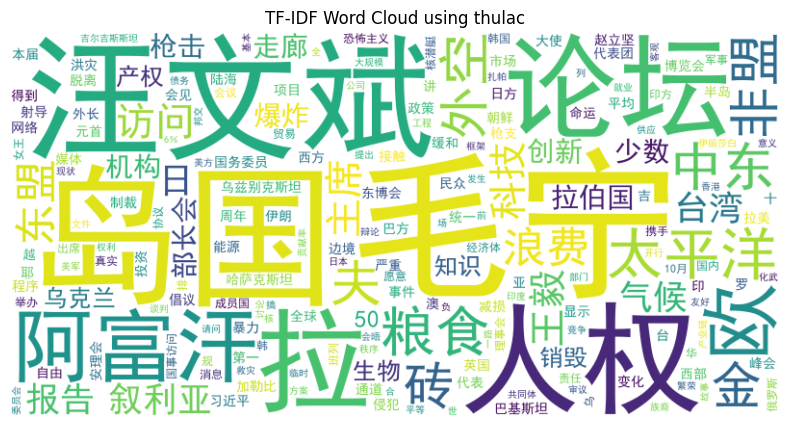

Top 20 Words by TF-IDF using snownlp:
     word     tfidf
7       毛  0.051363
1481    汪  0.043988
1482   文斌  0.043988
1016   岛国  0.037987
190    人权  0.037598
3069   论坛  0.032012
1860  阿富汗  0.029254
4089  阿拉伯  0.029091
852   太平洋  0.027363
1616    砖  0.027026
1491   粮食  0.026616
4021   非盟  0.024728
1493   浪费  0.023684
3068   中东  0.022974
1075    武  0.022247
4168   中拉  0.022220
915    科技  0.022075
604     金  0.021800
2204    外  0.020608
1116   创新  0.020417




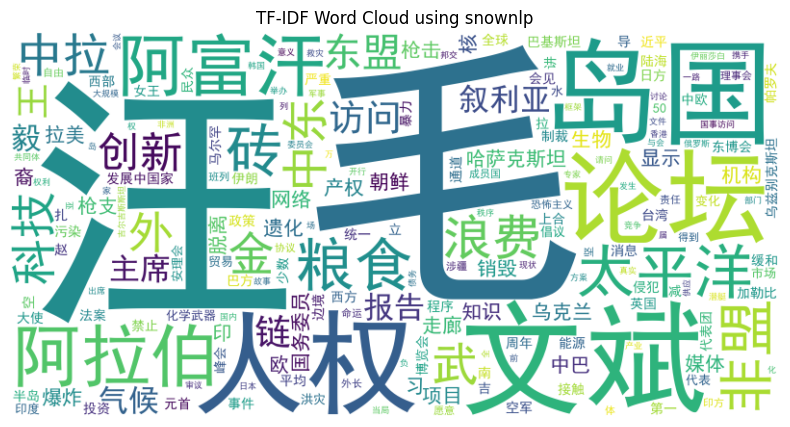

Top 20 Words by TF-IDF using nlpir:
     word     tfidf
986    岛国  0.044289
182    人权  0.036705
505     拉  0.031531
2945   论坛  0.030942
1806  阿富汗  0.030500
3902  阿拉伯  0.029332
829   太平洋  0.028422
1205    欧  0.027752
1572    砖  0.027692
1449   粮食  0.027201
592     金  0.025874
3845    盟  0.024932
1037   化武  0.024689
1451   浪费  0.024238
163     裔  0.023773
1324    空  0.023293
2944   中东  0.023027
890    科技  0.021589
162     非  0.021212
1737   访问  0.020848




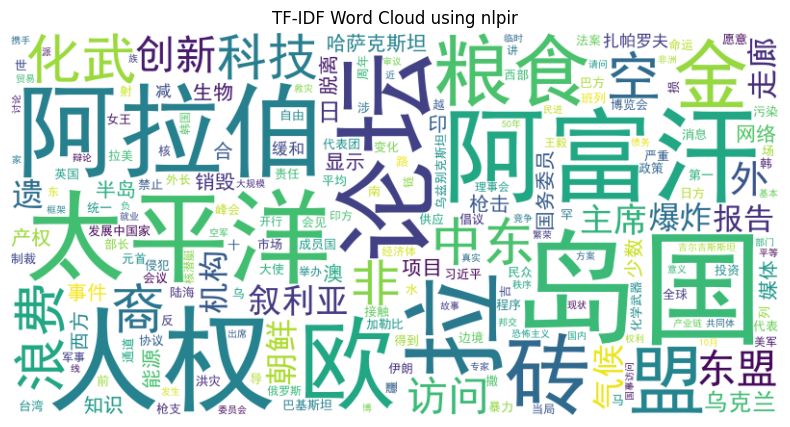

In [1]:
import os
import jieba
import thulac
import snownlp
import pynlpir
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
import math
import re

# 初始化NLPIR
pynlpir.open()

# 读取停用词
def read_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = set(f.read().splitlines())
    return stopwords

# 读取文本文件
def read_text_files(directory):
    texts = []
    for i in range(1, 21):
        file_path = os.path.join(directory, f'{i}.txt')
        with open(file_path, 'r', encoding='utf-8') as f:
            texts.append(f.read())
    return texts

# 分词函数
def jieba_tokenize(text, stopwords):
    words = jieba.lcut(text)
    return [word for word in words if word not in stopwords and re.match(r'\w+', word)]

def thulac_tokenize(text, stopwords, thulac_obj):
    words_with_pos = thulac_obj.cut(text, text=True).split()
    words = [word.split('_')[0] for word in words_with_pos]
    return [word for word in words if word not in stopwords and re.match(r'\w+', word)]

def snownlp_tokenize(text, stopwords):
    words = snownlp.SnowNLP(text).words
    return [word for word in words if word not in stopwords and re.match(r'\w+', word)]

def nlpir_tokenize(text, stopwords):
    words = pynlpir.segment(text, pos_tagging=False)
    return [word for word in words if word not in stopwords and re.match(r'\w+', word)]

# 计算词频
def calculate_tf(word_list):
    tf = defaultdict(int)
    for word in word_list:
        tf[word] += 1
    total_words = len(word_list)
    return {word: count / total_words for word, count in tf.items()}

# 计算IDF
def calculate_idf(doc_word_lists):
    N = len(doc_word_lists)
    idf = defaultdict(float)
    for doc in doc_word_lists:
        unique_words = set(doc)
        for word in unique_words:
            idf[word] += 1
    for word in idf:
        idf[word] = math.log(N / (idf[word] + 1))
    return idf

# 计算TF-IDF
def calculate_tf_idf(tf, idf):
    tf_idf = {word: tf[word] * idf[word] for word in tf}
    return tf_idf

# 绘制词云
def plot_wordcloud(word_freq, title):
    wordcloud = WordCloud(font_path='simhei.ttf', width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 主函数
def main():
    directory = 'D:\\code\\natural_language_processing\\lab2\\dataset'
    stopwords_file = 'D:\\code\\natural_language_processing\\lab1\\cn_stopwords.txt'
    stopwords = read_stopwords(stopwords_file)
    texts = read_text_files(directory)

    thulac_obj = thulac.thulac()

    tokenizers = {
        'jieba': jieba_tokenize,
        'thulac': thulac_tokenize,
        'snownlp': snownlp_tokenize,
        'nlpir': nlpir_tokenize
    }

    all_doc_word_lists = defaultdict(list)
    for tokenizer_name, tokenizer_func in tokenizers.items():
        for text in texts:
            if tokenizer_name == 'thulac':
                words = tokenizer_func(text, stopwords, thulac_obj)
            else:
                words = tokenizer_func(text, stopwords)
            all_doc_word_lists[tokenizer_name].append(words)

    idfs = {tokenizer_name: calculate_idf(doc_word_lists) for tokenizer_name, doc_word_lists in all_doc_word_lists.items()}

    for tokenizer_name, doc_word_lists in all_doc_word_lists.items():
        tf_idfs = []
        for words in doc_word_lists:
            tf = calculate_tf(words)
            tf_idf = calculate_tf_idf(tf, idfs[tokenizer_name])
            tf_idfs.append(tf_idf)

        combined_tf_idf = defaultdict(float)
        for tf_idf in tf_idfs:
            for word, score in tf_idf.items():
                combined_tf_idf[word] += score

        # 转换为DataFrame并排序
        df = pd.DataFrame(list(combined_tf_idf.items()), columns=['word', 'tfidf'])
        df = df.sort_values(by='tfidf', ascending=False).head(20)

        # 打印词频最高的20个词
        print(f"Top 20 Words by TF-IDF using {tokenizer_name}:")
        print(df)
        print("\n")

        plot_wordcloud(combined_tf_idf, f'TF-IDF Word Cloud using {tokenizer_name}')

if __name__ == '__main__':
    main()